# Análise de dados das receitas recebidade pelo IBAMA

O [IBAMA](https://www.gov.br/ibama/pt-br) é um orgão do governo federal brasileiro cujo objetivo está na 

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Portal de Dados Aberto](https://dados.gov.br/dados/conjuntos-dados/evolucao-das-receitas-arrecadadas).

Para esta análise exploratória inicial, será baixado apenas o arquivo no formato CSV

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o conjunto de dados exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.
No momento que estou fazendo essa análise, o relatório das receitas arrecadadas foi atualizado até 30/11/2023 19:01

Pensando nisso, disponibilizamos [aqui]() o conjunto que utilizamos, para que você sempre consiga utilizar esse material.

Com isso em mente, vamos ao projeto.

In [1]:
# importação das bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange

%matplotlib inline

In [2]:
def grafico_barra(dados: pd.DataFrame, coluna: str,
                  qt_barra: int, titulo: str) -> None:
    """Função para geração dos gráficos de barras de acordo com a coluna
       desejada, utilizando a contagem de cada valor da coluna.
       
       :param dados: Dados a serem utilizados para geração do gráfico
       :type dados: pd.DataFrame
       :param coluna: Nome da coluna para contagem dos valores dela
       :type coluna: str
       :param qt_barra: Quantidade de barras a serem exibidas no gráfico
       :type qt_barra: str
       :param titulo: Nome do título do gráfico de barra
       :type titulo: str
    """
    plt.figure(figsize=(15, 5))
    if qt_barra >= 10:
        dados.value_counts(coluna)[:qt_barra].sort_values().plot(
            kind='barh', color=plt.cm.Set1(arange(qt_barra-1, -1, -1)))
        plt.xticks(fontsize=20, rotation=0)
        plt.xlabel('Contagem', fontdict={'fontsize': 20})
        plt.yticks(fontsize=15)
    else:
        dados.value_counts(coluna)[:qt_barra].plot(
            kind='bar', color=plt.cm.Set2(arange(qt_barra)))
        plt.xticks(rotation=0, fontsize=20)
        plt.ylabel('Contagem', fontdict={'fontsize': 20})
        plt.yticks(fontsize=20)
    plt.title(titulo, fontdict={'fontsize': 20, 'fontweight':'bold'})
    plt.show();
    return None

In [3]:
def grafico_barra_colunas(dados: pd.DataFrame, col1: str,
                          col2: str, qt_barra: int,
                          titulo: str) -> None:
    """Função para geração dos gráficos de barras de acordo com as colunas
       desejadas.
       
       :param dados: Dados a serem utilizados para geração do gráfico
       :type dados: pd.DataFrame
       :param col1: Nome da primeira coluna para contagem dos valores dela
       :type coluna: str
       :param col2: Nome da segunda coluna para contagem dos valores dela
       :type coluna: str
       :param qt_barra: Quantidade de barras a serem exibidas no gráfico
       :type qt_barra: str
       :param titulo: Nome do título do gráfico de barra
       :type titulo: str
    """
    plt.figure(figsize=(15, 5))
    if qt_barra >= 10:
        plt.barh(dados[col1][:qt_barra], dados[col2][:qt_barra])
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
    else:
        plt.bar(dados[col1][:qt_barra], dados[col2][:qt_barra])
        plt.xticks(rotation=20)
    plt.title(titulo, fontdict={'fontsize': 20, 'fontweight':'bold'})
    plt.show();
    return None

In [4]:
# Importação dos dados para análise
df: pd.DataFrame = pd.read_csv('receitas_arrecadadas.csv', sep=';')

**Dicionário das variáveis**

* `Código da Receita` - número do tipo da receita no sistema 
* `Descrição Receita` - descrição do tipo da receita arrecadada
* `Valor (R$)` - valor total arrecadado da receita
* `Quantidade` - quantidade de vezes que aquela receita foi arrecadada
* `Ano` - ano de arrecadação do tipo da receita
* `Última Atualização Relatório` - Data de atualização dos dados do relatório

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [5]:
# Mostra as 5 primeiras linhas do dataframe
df.head()

,Código da Receita,Descrição Receita,Valor (R$),Quantidade,Ano,Última Atualização Relatório
0,9999,A classificar,"4.755,2",53,1996,30/11/2023 19:01
1,9999,A classificar,"97.610,9",144,1997,30/11/2023 19:01
2,9999,A classificar,"184.841,8",271,1998,30/11/2023 19:01
3,9999,A classificar,"45.816,8",218,1999,30/11/2023 19:01
4,9999,A classificar,"154.251,1",205,2000,30/11/2023 19:01


In [6]:
# Mostra as 5 últimas linhas do dataframe
df.tail()

,Código da Receita,Descrição Receita,Valor (R$),Quantidade,Ano,Última Atualização Relatório
1021,4055,Vistoria da flora,"4.171,6",5,2015,30/11/2023 19:01
1022,4055,Vistoria da flora,"735,1",2,2016,30/11/2023 19:01
1023,4055,Vistoria da flora,"489,1",1,2017,30/11/2023 19:01
1024,4055,Vistoria da flora,"244,2",3,2019,30/11/2023 19:01
1025,4055,Vistoria da flora,"1.071,4",1,2023,30/11/2023 19:01


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [7]:
# Identificar o volume de dados do DataFrame
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")

# Verificar os tipos das colunas do dataset
display(df.dtypes)

Entradas:	 1026
Variáveis:	 6



Código da Receita                int64
Descrição Receita               object
Valor (R$)                      object
Quantidade                       int64
Ano                              int64
Última Atualização Relatório    object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que todas as colunas do dataset não possui valores faltantes, o que é algo muito bom de se ver já que, no mundo real, é normal faltar dados.

In [8]:
# Ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Código da Receita               0.0
Descrição Receita               0.0
Valor (R$)                      0.0
Quantidade                      0.0
Ano                             0.0
Última Atualização Relatório    0.0
dtype: float64

### **Q3. Verificar se os dados estão preenchidos corretamente**

Antes de iniciar a análise, temos que observar se os dados da coluna `Ano` estão preenchido corretamente. Se não estiver, precisamos ver quantos registros estão preenchidos de forma equivocada para tomarmos uma decisão.

Como foram apenas 3 registros preenchidos de forma errada, decidiu-se elimina-los para não comprometer a análise geral.

In [9]:
# Mostrar o ano mais antigo e mais recente
print(f"Ano mais antigo da tabela:\t {df['Ano'].min()}")
print(f"Ano mais recente da tabela:\t {df['Ano'].max()}")

Ano mais antigo da tabela:	 1996
Ano mais recente da tabela:	 2929


In [10]:
# Removendo linhas com anos inexistente até o momento (2023)
df = df.loc[df["Ano"] <= 2023]

In [11]:
# Verificar a quantidade total de dados após remoção de linhas com o ano inexistente
print(f"Entradas:\t {df.shape[0]}")
print(f"Variáveis:\t {df.shape[1]}\n")

Entradas:	 1023
Variáveis:	 6



### Q4. Quais os tipos de receitas mais arrecadados pelo IBAMA entre 1996 a 2023?

A coluna da variável `Descrição Receita` indica os tipos de receitas arrecadadas pelo IBAMA.

Vamos contar os tipos de receitas arrecadadas, usando o método `value_counts()`.

In [12]:
# Mostrar a quantidade de cada tipo de receita arrecadada
df['Descrição Receita'].value_counts()

Descrição Receita
Penalidade pecuniária - Controle ambiental          28
Restituição                                         28
Penalidade pecuniária - Outras                      28
Penalidade pecuniária - Flora                       28
Penalidade pecuniária - Fauna                       28
                                                    ..
Serviços diversos                                    1
Serviços diversos da fauna                           1
Registro da pesca - Embarcação peixe demersal        1
Expedição ou renovação anual de carteira - Fauna     1
Renovação de registro moto-serra - Proprietário      1
Name: count, Length: 90, dtype: int64

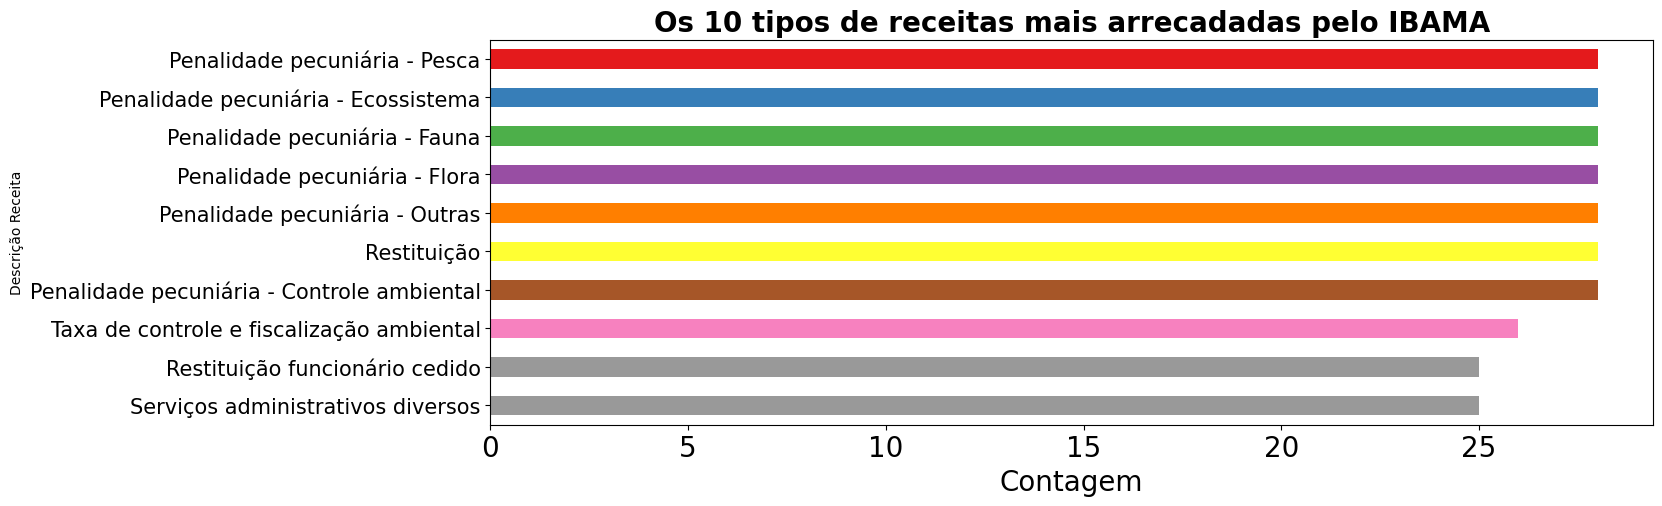

In [13]:
grafico_barra(df, 'Descrição Receita',
              10, 'Os 10 tipos de receitas mais arrecadadas pelo IBAMA')

### Q5. Quanto o IBAMA arrecadou, de forma total, com cada tipo de receitas?

A coluna da variável `Descrição Receita` mostra quais receitas foram recebidas pelo IBAMA

Primeiro, vamos converter os valores da coluna `Valor (R$)` para númerico, para depois criar um novo dataframe com o valor total de cada receita recebidas, de 1996 até 2023.

In [14]:
# Converter a coluna para valor numérico
df['Valor (R$)'] = df['Valor (R$)'].apply(
    lambda x: float(x.replace(".","").replace(",",".")))
df['Valor (R$)'] = df['Valor (R$)'].astype(float)

In [15]:
# Soma do valor total por receita de 1996 até 2023
df_total_receita: pd.DataFrame = df.groupby(
    'Descrição Receita', as_index=False)['Valor (R$)'].agg(
        ['sum', 'count']).sort_values(by='sum', ascending=False)
print("Soma valor total por receita:\n", df_total_receita)

Soma valor total por receita:
                                    Descrição Receita           sum  count
86         Taxa de controle e fiscalização ambiental  6.648072e+09     26
36                     Penalidade pecuniária - Flora  8.496878e+08     28
33        Penalidade pecuniária - Controle ambiental  8.266258e+08     28
39                    Penalidade pecuniária - Outras  1.601942e+08     28
35                     Penalidade pecuniária - Fauna  1.216795e+08     28
..                                               ...           ...    ...
30                                Ocupação de imóvel  2.926000e+02      2
54  Registro da pesca - Embarcação outros crustáceos  1.913000e+02      2
84                        Serviços diversos da fauna  1.000000e+02      1
68   Renovação de registro moto-serra - Proprietário  8.000000e+01      1
15  Expedição ou renovação anual de carteira - Fauna  5.980000e+01      1

[90 rows x 3 columns]


In [16]:
# Visualização das 10 maiores receitas
df_total_receita[:10]

,Descrição Receita,sum,count
86,Taxa de controle e fiscalização ambiental,6.648072e+09,26
36,Penalidade pecuniária - Flora,8.496878e+08,28
33,Penalidade pecuniária - Controle ambiental,8.266258e+08,28
39,Penalidade pecuniária - Outras,1.601942e+08,28
35,Penalidade pecuniária - Fauna,1.216795e+08,28
32,Penalidade pecuniária - Cadastro Técnico Federal,9.002095e+07,22
29,Multa descumprimento de TAC,7.955791e+07,16
40,Penalidade pecuniária - Pesca,5.962416e+07,28
66,Renovação de registro da flora,4.369803e+07,16
12,Avaliação/análise - Controle Ambiental (PPA),4.086578e+07,25


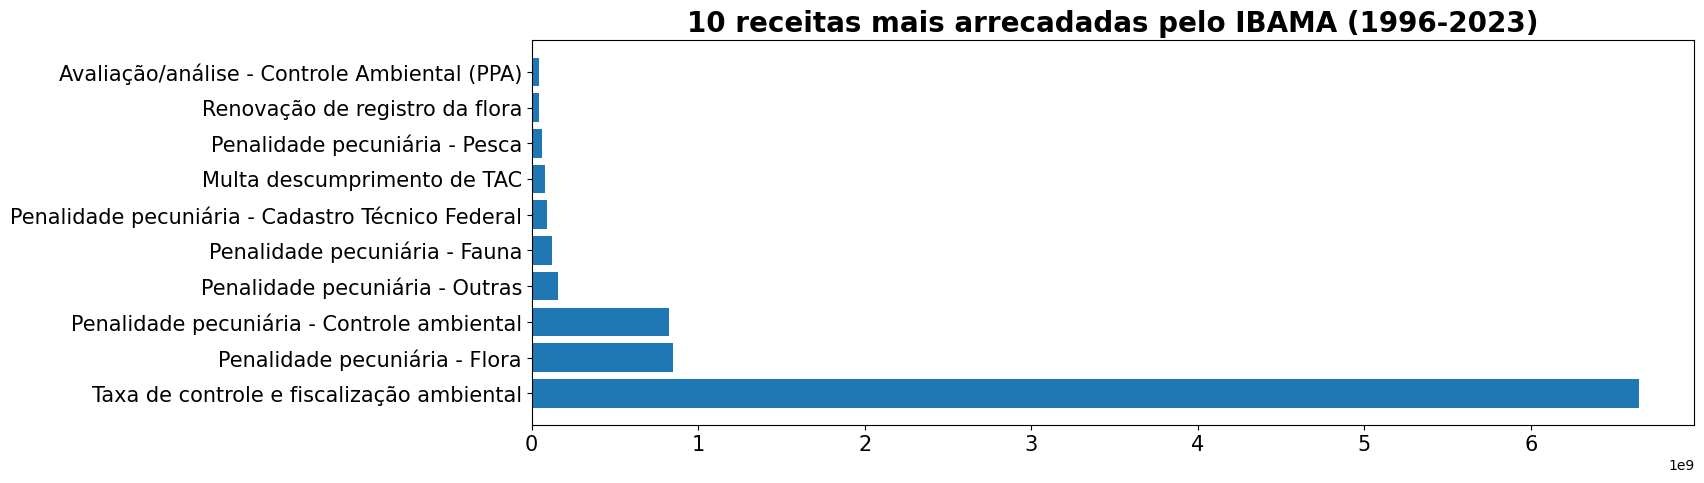

In [17]:
# Geração do gráfico com as 10 maiores receitas durante 1996 até 2013
grafico_barra_colunas(df_total_receita, 'Descrição Receita',
                      'sum', 10,
                      '10 receitas mais arrecadadas pelo IBAMA (1996-2023)')

### Q6. Quanto o IBAMA arrecadou, de forma anual, com todo o tipo de receita?

A coluna da variável `Ano` mostra o registro anual de cada receita recebida pelo IBAMA

Então vamos criar um dataframe com o somatório de todas as receitas recebidas pelo IBAMA em cada ano.

In [18]:
# Soma do valor total arrecadado por ano
df_total_ano: pd.DataFrame = df.groupby(
    'Ano', as_index=False)['Valor (R$)'].agg('sum')
print("Soma valor total por ano:\n", df_total_ano)

Soma valor total por ano:
      Ano   Valor (R$)
0   1996   13436989.7
1   1997   26904403.9
2   1998   22804469.0
3   1999   28675872.2
4   2000   81526767.4
5   2001   49982497.8
6   2002   82528796.4
7   2003   83813807.4
8   2004  101401547.3
9   2005  125349452.5
10  2006  145083467.9
11  2007  187602791.9
12  2008  221410883.8
13  2009  239377191.2
14  2010  207354280.2
15  2011  191069073.7
16  2012  276291595.4
17  2013  369293162.1
18  2014  375321475.5
19  2015  361013488.7
20  2016  578136536.9
21  2017  649890897.7
22  2018  745787615.5
23  2019  742516947.1
24  2020  668686148.7
25  2021  757020132.3
26  2022  825551315.8
27  2023  859627936.1


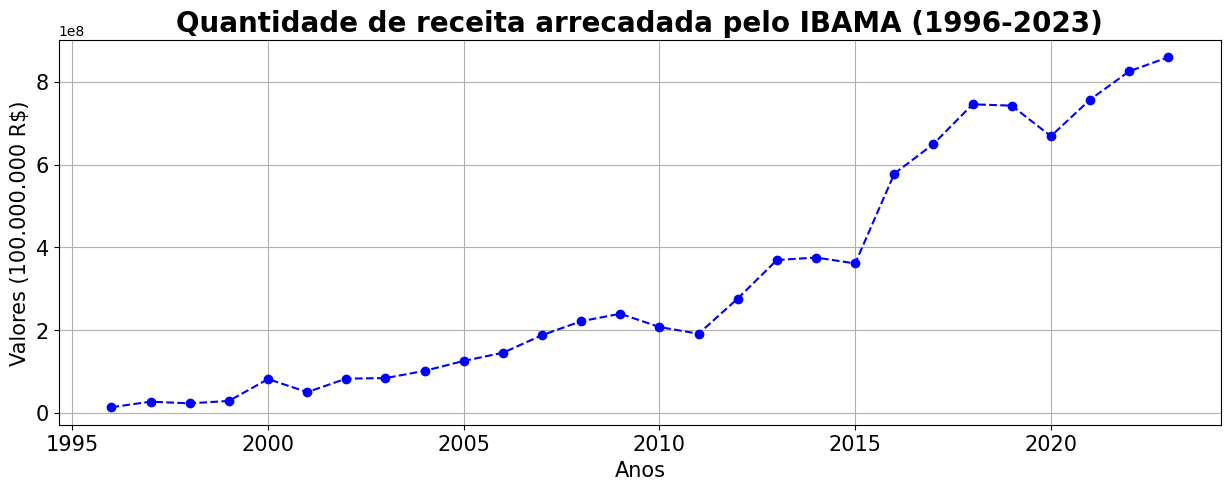

In [19]:
# Geração do gráfico temporal de receita arrecadada pelo IBAMA (1996-2023)
plt.figure(figsize=(15, 5))
plt.plot(df_total_ano['Ano'], df_total_ano['Valor (R$)'],
         marker='o', linestyle='--', color='b')
plt.xlabel('Anos', fontsize=15)
plt.ylabel('Valores (100.000.000 R$)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Quantidade de receita arrecadada pelo IBAMA (1996-2023)',
          fontdict={'fontsize': 20, 'fontweight':'bold'})
plt.grid(True)
plt.show();

In [20]:
# Separação da receita TCFA para efeito de comparação com o total arrecadado
df_tcfa: pd.DataFrame = df.loc[
    df["Descrição Receita"] == 'Taxa de controle e fiscalização ambiental']

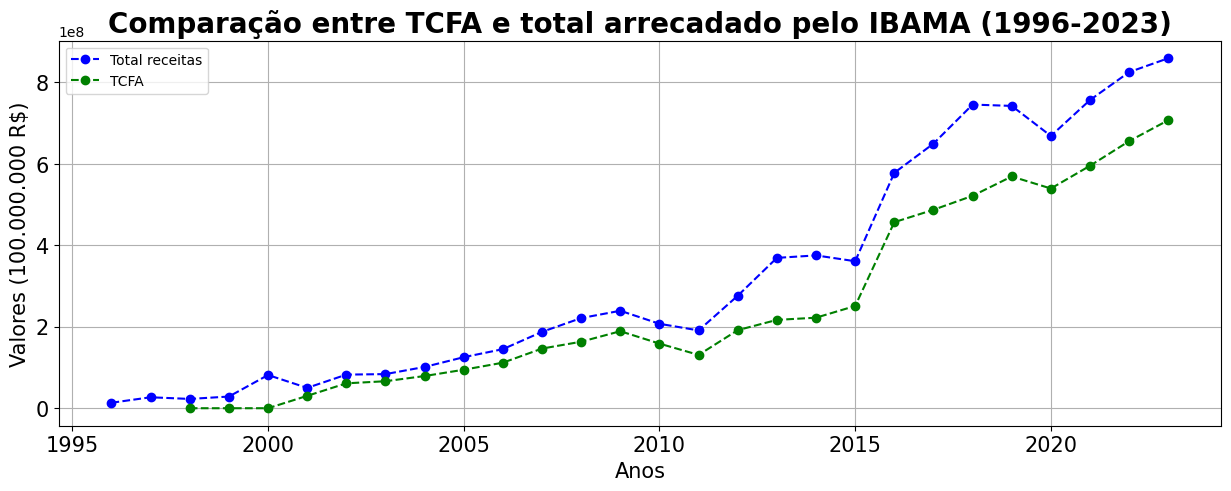

In [21]:
# Geração do gráfico temporal comparação entre TCFA e total arrecadado pelo IBAMA (1996-2023)
plt.figure(figsize=(15, 5))
plt.plot(df_total_ano['Ano'], df_total_ano['Valor (R$)'],
         marker='o', linestyle='--', color='b', label='Total receitas')
plt.plot(df_tcfa['Ano'], df_tcfa['Valor (R$)'],
         marker='o', linestyle='--', color='green', label='TCFA')
plt.xlabel('Anos', fontsize=15)
plt.ylabel('Valores (100.000.000 R$)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Comparação entre TCFA e total arrecadado pelo IBAMA (1996-2023)',
          fontdict={'fontsize': 20, 'fontweight':'bold'})
plt.grid(True)
plt.legend(loc="upper left")
plt.show();

### Q7. Quais valores estatísticos do total arrecadado, por ano, das receitas pelo IBAMA?

Para verificar os dados estatísticos, basta digitar o comando `describe()` e/ou gerar o gráfico de caixa

In [22]:
# Dados estatísticos do total de receita arrecadada pelo IBAMA durante o período
df_total_ano['Valor (R$)'].describe()

count    2.800000e+01
mean     3.220521e+08
std      2.840161e+08
min      1.343699e+07
25%      8.349255e+07
50%      2.143826e+08
75%      5.960751e+08
max      8.596279e+08
Name: Valor (R$), dtype: float64

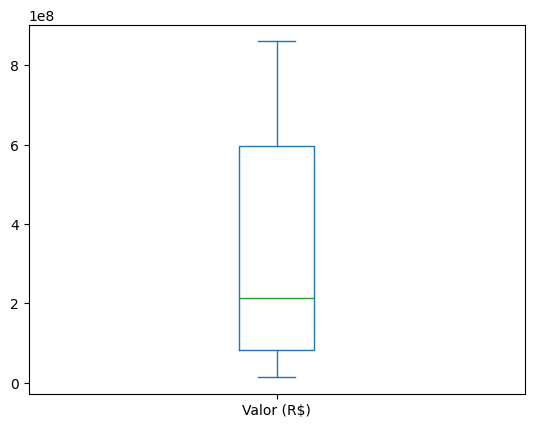

In [23]:
# Visualização dos dados estatísticos através do gráfico de caixa (boxplot) 
df_total_ano['Valor (R$)'].plot(kind='box');

## Conclusões

Foi feita apenas uma análise gera na base de dados de receitas recebidas pelo IBAMA, porém já percebe-se que dá para tirar alguns insights interessantes.

* O tipo de receita mais recebida (contabilizada) pelo IBAMA foi `Penalidade Pecuniária - Pesca`
* A receita que gerou mais retorno para o IBAMA foi `Taxa de controle e fiscalização ambiental`
* O ano mais lucrativo para o IBAMA foi o ano de `2023`
* A `Taxa de controle e fiscalização ambiental` foi responsável pela alavancagem das receitas do IBAMA, principalmente, de 2015 em diante

Por fim, lembra-se que a análise deste dataset foi feita de uma forma geral, sendo poderiamos fazer análise mais específicas e detalhadas, como por exemplo, analisar a evolução, ano a ano, da receita 'Taxa de controle e fiscalização ambiental' que trouxe mais retorno para IBAMA. Toda análise vai depender da finalidade específica daquele resultado que se busca.